In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

878.7241989677816


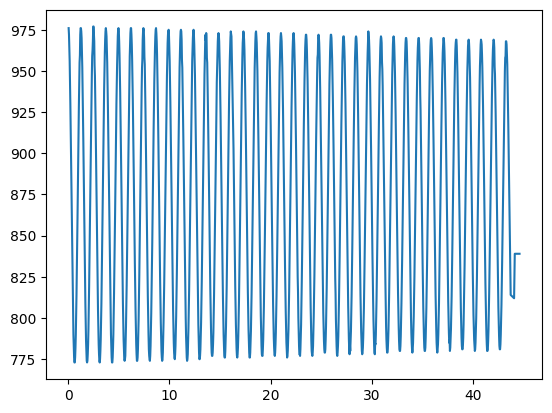

In [17]:
with open('spring.csv', 'r') as file:
    data = file.readlines()
x = []
for line in data:
    values = line.strip().split(',')
    x.append(float(values[1]))

mean = np.mean(x)
print(mean)

t = np.linspace(0, len(x)/29.66,len(x))

x_new = []
t_new = []

for i in range(len(x)):
    if x[i] < 1000:
        x_new.append(x[i])
        t_new.append(t[i])

x_new = x_new[1:]
t_new = t_new[1:]
plt.plot(t_new, x_new)
plt.show()

Identifying consecutive maxima, we could find the average period T (in seconds) and hence we could find the angular frequency of oscillations 
$$w = \frac{2\pi}{T} \; \text{(in rad/s)}$$
Noting that the mass is given by m = 1kg.

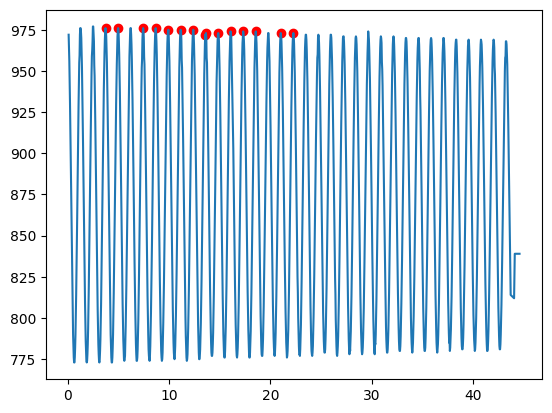

1.2371679845102794


In [18]:
xm = []
tm = []
for i in range(1, 700):
    if x_new[i+1] > x_new[i] and x_new[i+1] > x_new[i+2]:
        xm.append(x_new[i+1])
        tm.append(t_new[i+1])
plt.scatter(tm, xm, color = 'r')
plt.plot(t_new[1:], x_new[1:])
plt.show()


T_vals = [tm[1] - tm[0]]
for i in range(2, len(tm)-3):
    T_vals.append(tm[i+1] - tm[i])
T_vals.append(tm[13]-tm[12])
T = np.mean(T_vals)
print(T)

The harmonic oscillator equation is of the form
$$\ddot x + w^2 = 0$$
Where $w = \sqrt{\frac{k}{m}}$. Hence finding w is enough to give us k such that 
$$k = w^2m$$

In [34]:
w = (2*np.pi)/T
k = w**2
print("k =", k, "kg/s^2")

k = 25.793031655722633 kg/s^2


Another way to find k is by reducing the 2nd order equation of the harmonic oscillator to a system of 2 1st order equations and using linear regression on the second equation to find the coefficient (-k):
$$\dot x = v$$
$$\dot v = -\frac{k}{m}x$$

In [38]:
v = np.gradient(x_new, t_new)
dv = np.gradient(v, t_new)
reg = LinearRegression()
phi = np.array([x_new]).T
fit = reg.fit(phi, dv)
coef = reg.coef_
print("-k =",coef[0], "kg/s^2")

-k = -25.419314132672408 kg/s^2
